<center><span style="font-size:25px;">ПРОГНОЗИРОВАНИЕ ВЫРАБОТКИ ГАЗА НА СКВАЖИНАХ</span></center>

<div style="border-left: 8px solid #10564f; border-radius: 15px / 50px; box-shadow: 5px 5px 10px darkgray; background: lightgray; color: black; text-align:left; vertical-align: middle; padding:15px 20px 3px; width: auto;">

У известного предпринимателя уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода необходимо оценить, сколько денег будет приносить каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа.

**Задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — <b>Prod</b>) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.
</div>

<b><u>Признаки в данных:</u></b>

<table style="width: 50%; background: lightgray; color: black; padding: 0.2em; border-collapse: collapse; box-shadow: 5px 5px 10px darkgray; margin: 0px left; border: 1px solid #b0b0b0;">
<tbody>
<tr>
<td style="width: 20%; text-align: center; vertical-align: middle; background-color: #10564f; border: 1px solid #b0b0b0; padding: 0.2em;"><span style="color: #ffffff;">Признак</span></td>
<td style="width: 80%; text-align: center; vertical-align: middle; background-color: #10564f; border: 1px solid #b0b0b0; padding: 0.2em;"><span style="color: #ffffff;">Расшифровка</span></td>
</tr>
<tr>
<td style="width: 20%; text-align: left; border: 1px solid #b0b0b0; padding: 0.2em;">Well</td>
<td style="width: 80%; text-align: justify; border: 1px solid #b0b0b0; padding: 0.7em;">идентификатор скважины</td>
</tr>
<tr>
<td style="width: 20%; text-align: left; border: 1px solid #b0b0b0; padding: 0.2em;">Por</td>
<td style="width: 80%; text-align: justify; border: 1px solid #b0b0b0; padding: 0.7em;">пористость скважины (%)</td>
</tr>
<tr>
<td style="width: 20%; text-align: left; border: 1px solid #b0b0b0; padding: 0.2em;">Perm</td>
<td style="width: 80%; text-align: justify; border: 1px solid #b0b0b0; padding: 0.7em;">проницаемость скважины</td>
</tr>
<tr>
<td style="width: 20%; text-align: left; border: 1px solid #b0b0b0; padding: 0.2em;">

AI</td>
<td style="width: 80%; text-align: justify; border: 1px solid #b0b0b0; padding: 0.7em;">

акустический импеданс ($кг/м^2 \cdot 10^6$)</td>
</tr>
<tr>
<td style="width: 20%; text-align: left; border: 1px solid #b0b0b0; padding: 0.2em;">Brittle</td>
<td style="width: 80%; text-align: justify; border: 1px solid #b0b0b0; padding: 0.7em;">коэффициент хрупкости скважины (%)</td>
</tr>
<tr>
<td style="width: 20%; text-align: left; border: 1px solid #b0b0b0; padding: 0.2em;">TOC</td>
<td style="width: 80%; text-align: justify; border: 1px solid #b0b0b0; padding: 0.7em;">общий органический углерод (%)</td>
</tr>
<tr>
<td style="width: 20%; text-align: left; border: 1px solid #b0b0b0; padding: 0.2em;">VR</td>
<td style="width: 80%; text-align: justify; border: 1px solid #b0b0b0; padding: 0.7em;">коэффициент отражения витринита (%)</td>
</tr>
<tr>
<td style="width: 20%; text-align: left; border: 1px solid #b0b0b0; padding: 0.2em;">Prod (target)</td>
<td style="width: 80%; text-align: justify; border: 1px solid #b0b0b0; padding: 0.7em;">добыча газа в сутки (млн. кубических футов)</td>
</tr>
</tbody>
</table>

Проект был сделан на `Python 3.11.8`

<h2 id='contents'>Оглавляшка:</h2>

[Загружаемые библиотеки](#libs)

<center><span style="font-size:30px;"><a href="#linregmnk">Практика:</a> линейная регрессия по методу наименьших квадратов.</span></center> 

0. [Задание 5.0](#ex_5_0) Небольшой визуальный разведывательный анализ
1. [Задание 5.1](#ex_5_1) Матрица корреляции
2. [Задание 5.2](#ex_5_2) Модель регрессии по МНК, через матричную формулу
3. [Задание 5.3](#ex_5_3) Предсказание на новых данных
4. [Задание 5.4](#ex_5_4) Сравнение коэффициентов с показателями корреляции
5. [Задание 5.5](#ex_5_5) Удаление сильной и слабой корреляции. Вывод коэффициентов вручную. Вывод метрик по предсказаниям коэффициентов.
6. [Задание 5.6](#ex_5_6) То же самое, что и в задании 5.5, только через `LinearRegression`

<center><span style="font-size:30px;"><a href="#polyregpractice">Практика:</a> полиномиальная регрессия и регуляризация.</span></center> 

0. [Задание 8.1](#ex_8_1) Стандартизация + добавление полинома
1. [Задание 8.2](#ex_8_2) $L_{1} регуляризация$
2. [Задание 8.3](#ex_8_3) $L_{2} регуляризация$
3. [Задание 8.4](#ex_8_4) `ElasticNet`
4. [Задание 8.5](#ex_8_5) Сводная таблица результатов

[Бонусное наблюдение](#bonus) Можно не читать

## Загружаемые библиотеки <a id='libs'></a>

In [1]:
from data.functions_akialema import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

pd.set_option('display.float_format', None)
#pd.set_option('display.float_format', '{:.6f}'.format)
np.set_printoptions(suppress=True, precision=4)
#np.set_printoptions(suppress=False, precision=8)

plt.style.use('seaborn-v0_8') #стиль отрисовки seaborn
%matplotlib inline

## Основное

[↑ contents](#contents)

<h3 id='linregmnk'>Линейная регрессия по методу наименьших квадратов.</h3>

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

In [2]:
incoming_df = pd.read_csv('https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1NQgKKgSc3QPtOLZ67x7vuj7ivUawXhBg')

# Сразу дропну неинформативный признак. В комментах пачки сказали не удалять сразу этот признак.
#incoming_df.drop(columns='Well', inplace=True)

my_info(incoming_df)

memory usage: 12.9 KB


,column,num of unique vals,type,mode,number of entries,NaN vals,number of dublics,describe
0,VR,95,float64,1.93,200,0,0,min...: 0.93max..: 2.87mean: 1.96std....: 0.30
1,Perm,110,float64,4.66,200,0,0,min...: 1.13max..: 9.87mean: 4.33std....: 1.73
2,TOC,120,float64,0.38,200,0,0,min...: -0.19max..: 2.18mean: 0.99std....: 0.48
3,AI,128,float64,2.45,200,0,0,min...: 1.28max..: 4.63mean: 2.97std....: 0.57
4,Por,188,float64,12.38,200,0,0,min...: 6.55max..: 23.55mean: 14.99std....: 2.97
5,Brittle,195,float64,40.24,200,0,0,min...: 10.94max..: 84.33mean: 48.16std....: 14.13
6,Prod,200,float64,2107.14,200,0,0,min...: 2107.14max..: 6662.62mean: 4311.22std....: 992.04
7,Well,200,int64,1.00,200,0,0,min...: 1.00max..: 200.00mean: 100.50std....: 57.88


[↑ contents](#contents)

<h3 id='ex_5_0'>Небольшой разведывательный анализ.</h3>

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

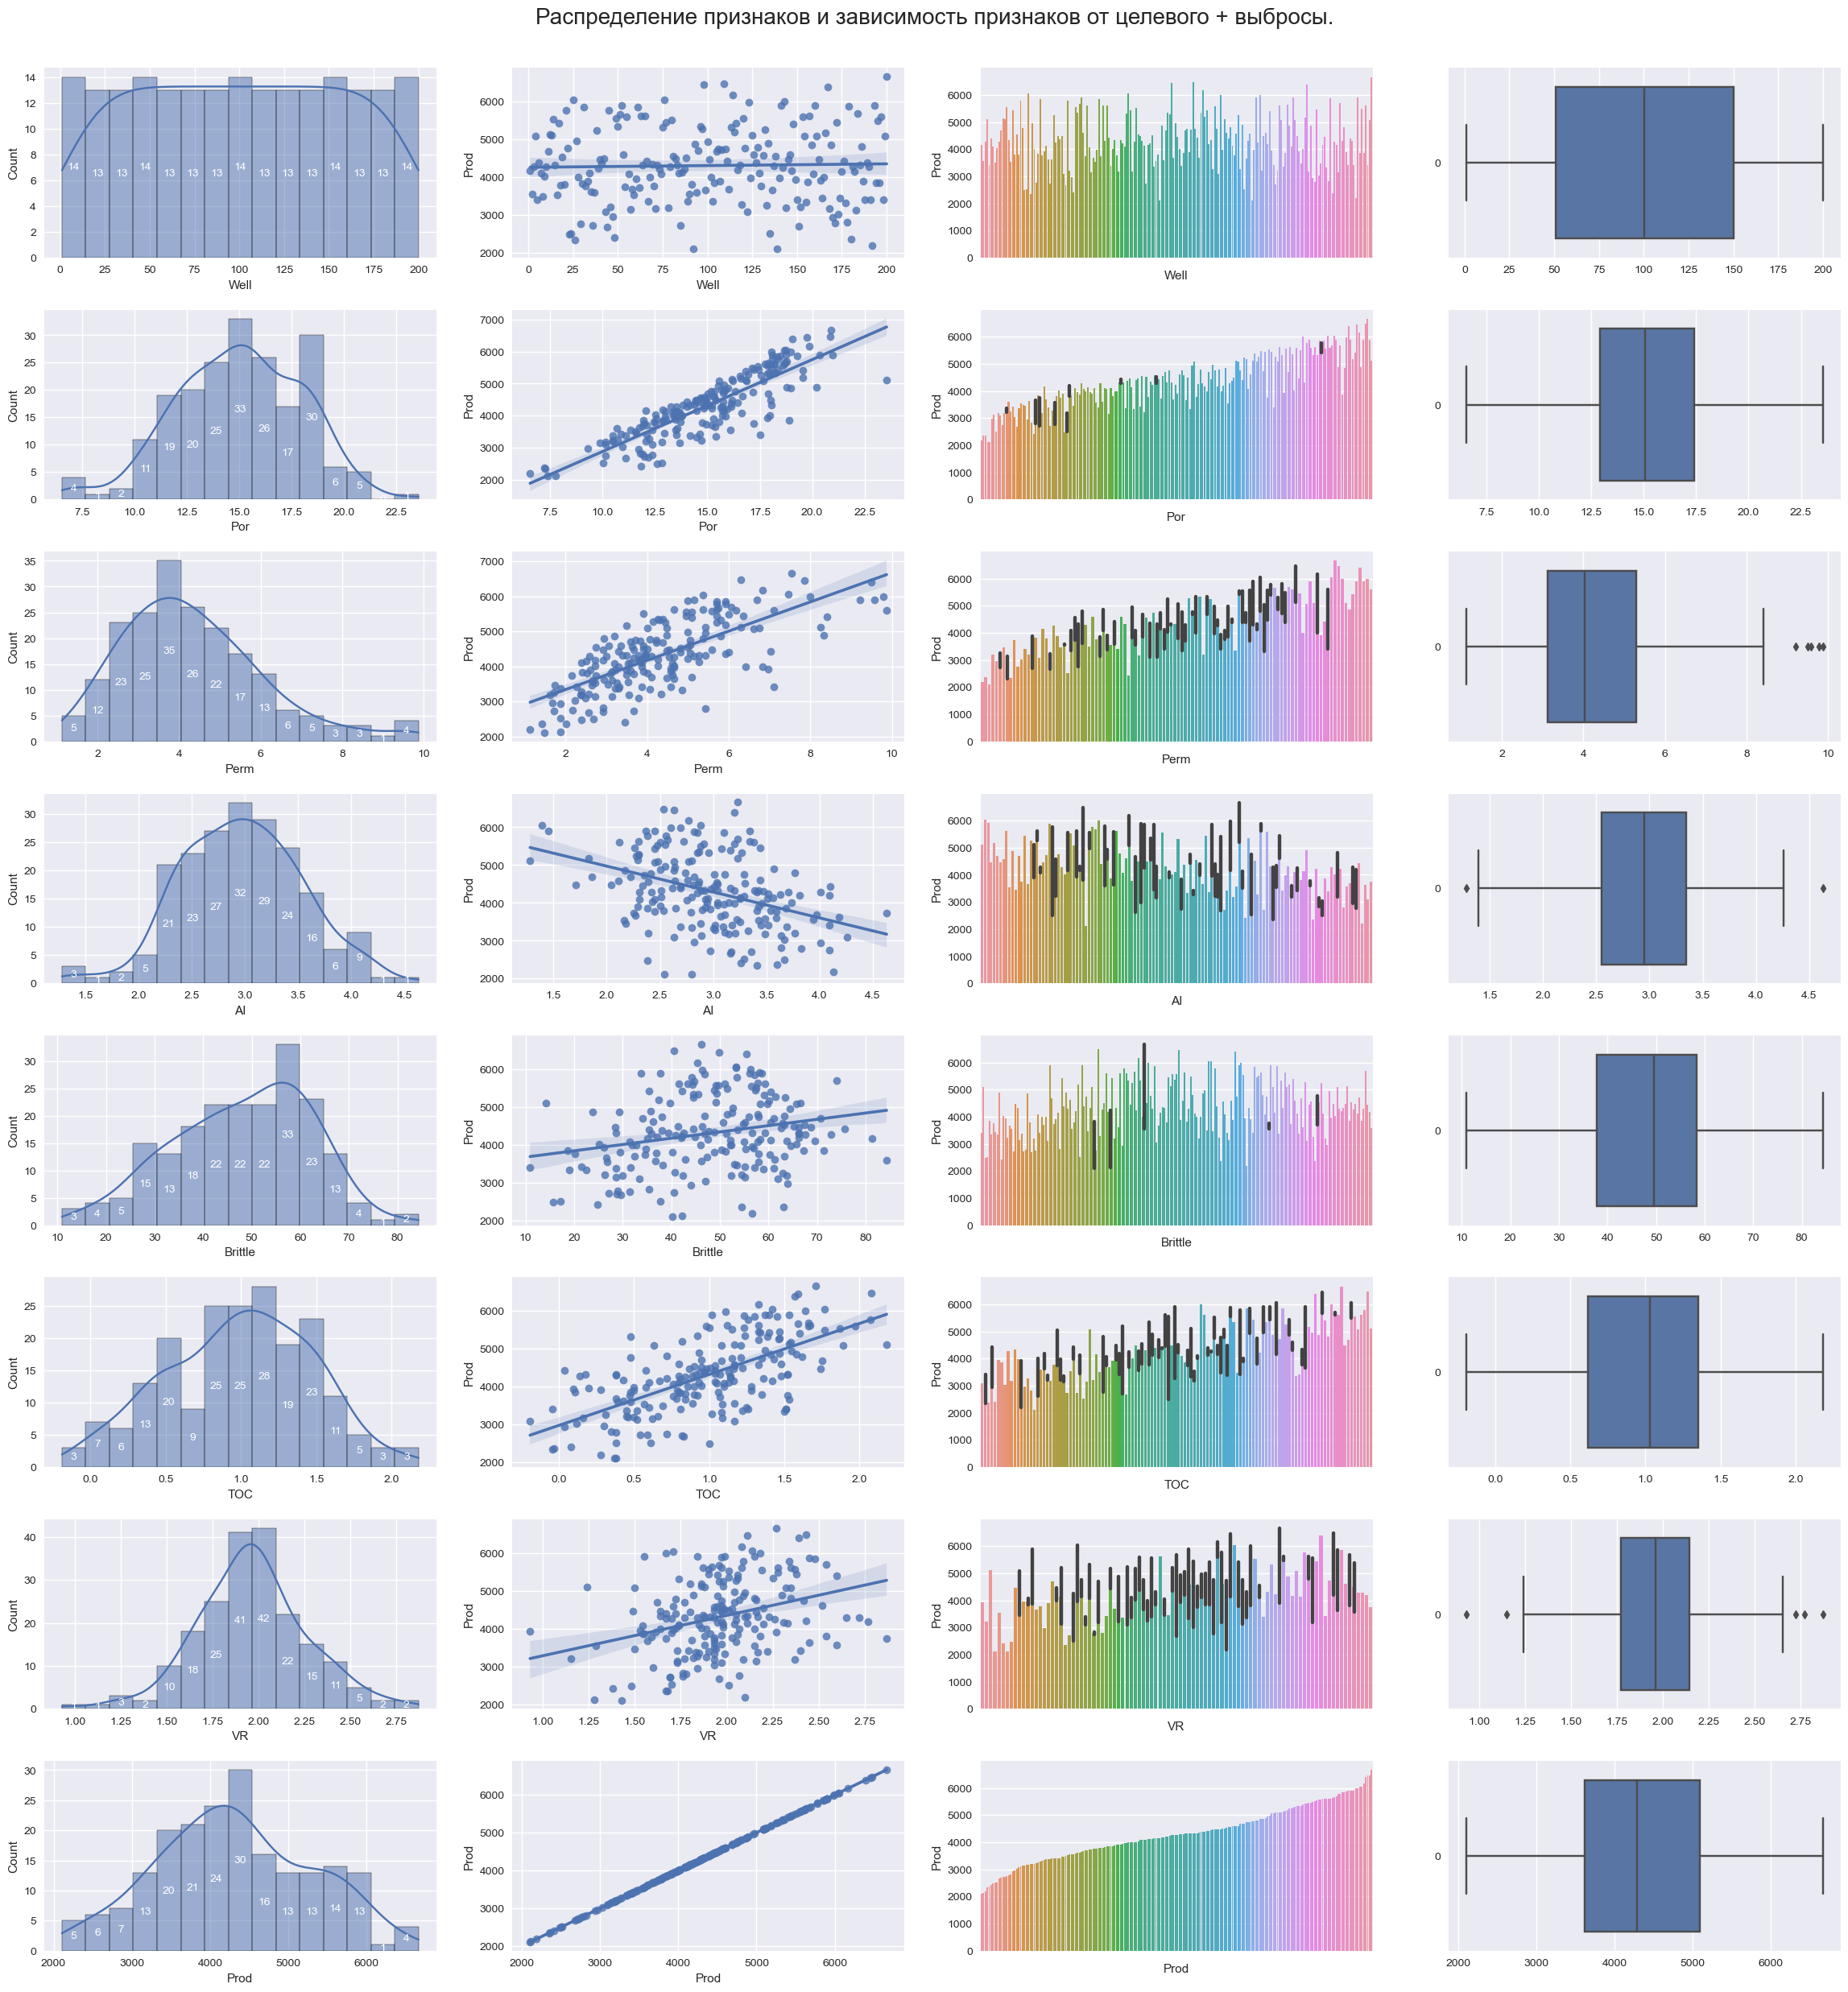

In [3]:
df_for_this_cell = incoming_df.copy()
targ_col = 'Prod'

fig, ax = plt.subplots(nrows=len(df_for_this_cell.columns), ncols=4, figsize=(23, 25))

fig.tight_layout(w_pad=4, h_pad=3) # расстояние между подграфиками
plt.subplots_adjust(top=0.95) # чтобы заголовок не налезал на графики

plt.suptitle('Распределение признаков и зависимость признаков от целевого + выбросы.').set_fontsize(20)

for i, feature in enumerate(df_for_this_cell):
    
    sns.histplot(data=df_for_this_cell, x=feature, ax=ax[i, 0], kde=True, bins=15)
    sns.regplot(data=df_for_this_cell, x=feature, y=targ_col, ax=ax[i, 1])
    sns.barplot(data=df_for_this_cell, x=feature, y=targ_col, ax=ax[i, 2])
    sns.boxplot(data=df_for_this_cell[feature], ax=ax[i, 3], orient='h')
    
    ax[i, 0].bar_label(ax[i, 0].containers[1], fmt='%.0f', label_type='center', color='white')
    ax[i, 2].set_xticklabels('')
plt.show('png')

Что я могу отметить, исходя из того, что вижу:

- Данные чистые, пропусков нет, дубликатов нет.
- Матрица - "высокая" и состоит из 8 признаков и 200 записей.
- Данные распределены +/- нормально. Нет логнормальных признаков.
- Масштабом сильно отличается лишь целевой признак.

- Признак `Por` имеет сильную линейную зависимость с целевым признаком.
- Как и признаки `Perm` и `TOC`, но менее.
- Признак `AI` имеет не большую обратную зависимость.
- Теоретически, выбросы наблюдаются только в 3 признаках: `Perm`, `AI` и `VR`.

[↑ contents](#contents)

<h3 id='ex_5_1'>Задание 5.1</h3> Матрица корреляции.

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

Ранг корреляционной матрицы: 8
Определитель = 0.0007299388072651914


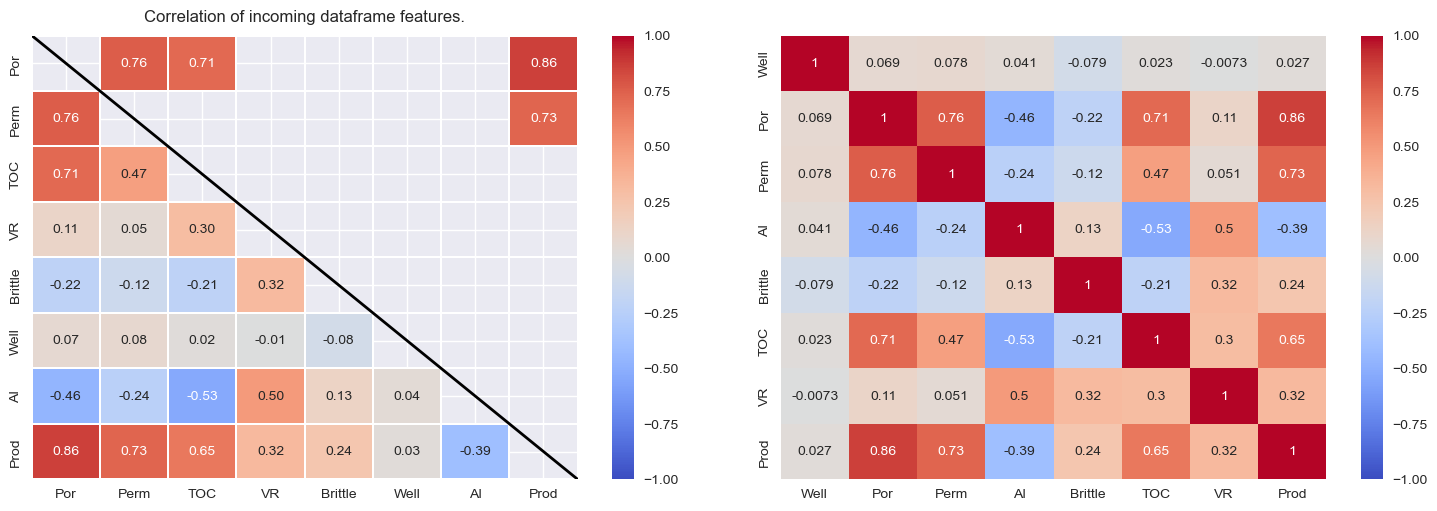

In [3]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))

fig.tight_layout(w_pad=2, h_pad=3) # расстояние между подграфиками

# График с использованием библиотек.
my_corr(incoming_df, corrneg=-0.7, corrpos=0.7, targ_col='Prod', xtickrot=0, ax=ax[0])

# А здесь вычисление матрицы корреляции вручную.
A = incoming_df.to_numpy().T.copy()

corr_list = []
for i in A:
    i_list = []
    for j in A:
        
        i_cent = i - np.mean(i)
        j_cent = j - np.mean(j)
        
        corr = np.sum(i_cent * j_cent) / np.sqrt(np.sum(i_cent**2) * np.sum(j_cent**2))
        
        i_list.append(corr)
    corr_list.append(i_list)

sns.heatmap(pd.DataFrame(corr_list, columns=incoming_df.columns, index=incoming_df.columns), annot=True, vmin=-1, vmax=1, cmap='coolwarm', ax=ax[1])

print(f"Ранг корреляционной матрицы: {np.linalg.matrix_rank(corr_list)}")
print(f"Определитель = {np.linalg.det(corr_list)}")
plt.show('png')

Прошу прощения за двойной график. Я просто проверял сам себя, т.к. первый график строится функцией через `.corr()`, а второй - вычисление корр-матрицы вручную.

Я вывел сортировку по целевому признаку (нижняя строка левого графика) и...
- признак `Por` = 0.86, очень сильная взаимосвязь (почти потолок сильной);
- признак `Perm` = 0.73, сильная взаимосвязь;
- `TOC` = 0.65.

Ну и остальные - копейки, `AI` обратная взаимосвязь -0.39.

Между собой:
- `Por` - `Perm` (0.76) и `Por` - `TOC` (Портос 0.71)

Отсеял по "сильной" корреляции. Среднюю и ниже - не рассматриваю.

Ранг матрицы равен количеству переменных, определитель крайне низок и стремится к нулю. 

Что касается третьего вопроса про "возможность применения линейной регрессии"... да вполне себе применима.<br>
Вот такой получается вектор:

>`A = incoming_df.drop(columns='Prod')`  
>`X = np.column_stack([np.ones(incoming_df.shape[0]), A])`  
>`y = incoming_df['Prod']`  

>`np.linalg.inv(X.T @ X) @ X.T @ y`  

>`array([-1230.26203694,   230.29581021,   116.2280334 ,  -363.73608557, 24.9966698 ,   -77.43674242,   783.18741348])`

Возможно коэффициенты большие. Я новичок и пока мало понимаю. Единственное, что понял, что если вот такой вот определитель крайне близок к нулю - <b>это плохо</b>. Других аргументов привести не могу. Прошу не снижать балл за подобный ответ на третий вопрос. В курсе не было точной характеристики касательно близкого к нулю определителя. Сказали, что плохо и начали разбирать чистые колинеарности, отличия между которыми я так тоже и не понял. Как объяснили, так и отвечаю. 

(ах да, добавлю, что коэффициенты я выводил без признака `Well`, т.к. дропнул его в начале, но потом почитал пачку и закомментил дроп этого признака)

[↑ contents](#contents)

<h3 id='ex_5_2'>Задание 5.2</h3> Модель регрессии по МНК, через матричную формулу.

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.

In [4]:
A = incoming_df.drop(columns='Prod')
X = np.column_stack([np.ones(A.shape[0]), A])
y = incoming_df['Prod']

intercoeff_vec_5_2 = np.linalg.inv(X.T @ X) @ X.T @ y

print("Вектор интерсепта+коэфф:")
display(pd.DataFrame([np.round(intercoeff_vec_5_2)], columns=np.hstack([['intercept'], A.columns])))
print(f"Проверка через линейную:\n0   {np.hstack([np.round(LinearRegression().fit(A, y).intercept_), np.round(LinearRegression().fit(A, y).coef_)])}")

Вектор интерсепта+коэфф:


,intercept,Well,Por,Perm,AI,Brittle,TOC,VR
0,-1232.0,0.0,230.0,116.0,-365.0,25.0,-78.0,785.0


Проверка через линейную:
0   [-1232.     0.   230.   116.  -365.    25.   -78.   785.]


Неинформативным лично я считаю признак `Well`, т.к. он состоит из исключительно уникальных элементов, как, к примеру, индекс.

* Если `Por` (пористость) увеличится на 1%, добыча газа увеличится на 230 $млн.фут^3/д$;
* Если `TOC` (углерод) увеличится на 1%, добыча газа уменьшится на 78 $млн.фут^3/д$;
* Если `AI` (импенданс) увеличится на 1 $кг/м^2 \cdot 10^6$, добыча газа уменьшится аж на 365 $млн.фут^3/д$.

Надеюсь я верно интерпретировал коэффициенты.

[↑ contents](#contents)

<h3 id='ex_5_3'>Задание 5.3</h3> Предсказание на новых данных.

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку ($\frac{\displaystyle\sum_{i=1}^{n} \lvert y_{i} - \hat{y}_{i} \rvert}{n}$) построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата.

In [5]:
new_data_5_3 = {'Well': 106.0, 'Por': 15.32, 'Perm': 3.71, 'AI': 3.29, 'Brittle': 55.99, 'TOC': 1.35, 'VR': 2.42}

y_pred_5_3 = intercoeff_vec_5_2 @ np.hstack([np.ones(1), pd.Series(new_data_5_3)])
y_true_5_3 = 4748.315024

print(f"Абсолютная ошибка = {y_true_5_3 - y_pred_5_3} млн.ф^3/д")
print_metrics(y_test=y,
              y_test_pred=[X @ intercoeff_vec_5_2],
              list_of_metrics=['mean_absolute_error', 'r2_score'],
              names=['X'])

Абсолютная ошибка = 25.250970292559032 млн.ф^3/д


,X
MAE,153.622971
r2,0.959851


Вот интересно, что подразумевалось в пункте **б**? Подразумевалось ли там добавление новых данных 201 строкой и расчёт метрик с добавленной строкой или же нет?))

Я посчитал без.

И по пункту а) абсолютная ошибка для новых данных с вычисленными коэффициентами составила.. не так уж и много, если смотреть только на число.. А вот если с буквами, 25 миллионов кубофутов в день - это очень даже много. Но 25 не 125.)

По пункту б).. я не делил на трейн и тест, обучение модели на всех данных сразу - приведёт к переобучению, т.к. модель подстроится под данные и чего тут интерпретировать. Но даже так, если абстрагироваться, модель ошибается аж на 153 !миллиона кубофутов, но Р2 показывает, что, мол, "скажи спасибо что 153 и я хороша аж на 96%". 

[↑ contents](#contents)

<h3 id='ex_5_4'>Задание 5.4</h3> Сравнение коэффициентов с показателями корреляции.

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

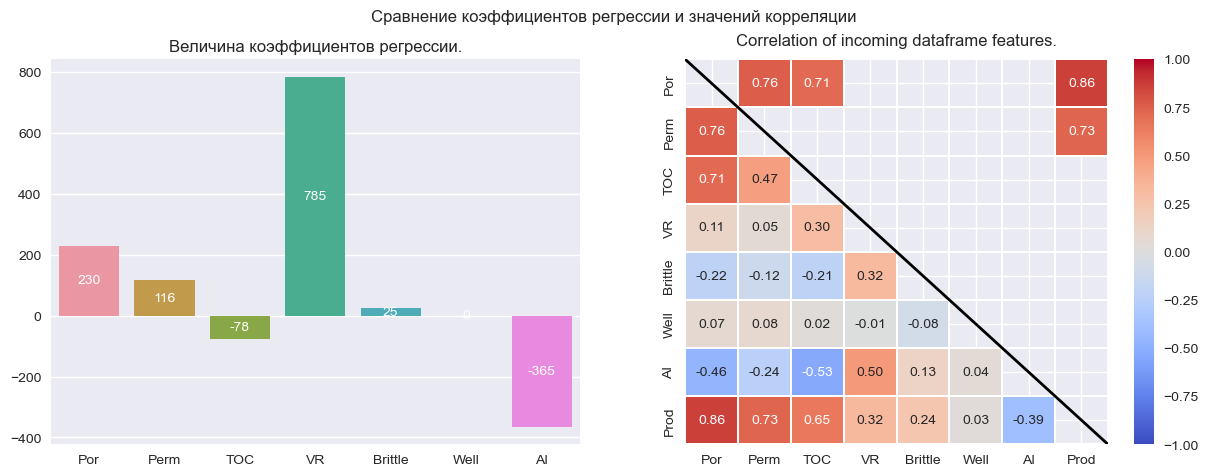

In [6]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))

series_for_first_plot = pd.Series(np.round(intercoeff_vec_5_2)[1:], index=A.columns).reindex(incoming_df.corr().sort_values('Prod').drop('Prod').index[::-1]).reset_index()

sns.barplot(series_for_first_plot, x='index', y=0, orient='v', ax=ax[0])
my_corr(incoming_df, corrneg=-0.7, corrpos=0.7, targ_col='Prod', xtickrot=0, ax=ax[1])

ax[0].bar_label(ax[0].containers[0], fmt='%.0f', label_type='center', color='white')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].set_title('Величина коэффициентов регрессии.')

plt.suptitle('Сравнение коэффициентов регрессии и значений корреляции')
plt.show('png')

Такс. 

Большинство признаков соответствуют своей зависимости. Т.е. `Por`: +230 и +0.86, `AI`: -365 и -0.39...  
А вот `TOC` - не соответствует: -78 и +0.65, что вызывает противоречие и это единственный признак, для ответа пункта **a)**.

У меня нет ответа на пункт **б)**. Даже гипотез. Чату гпт этот вопрос показался слишком сложным и он меня послал.) Говорит: премиум купи или завтра приходи.)) Улыбка считается за ответ на пункт **б**?)

[↑ contents](#contents)

<h3 id='ex_5_5'>Задание 5.5</h3> 
Удаление сильной и слабой корреляции.<br>
Вывод коэффициентов вручную.<br>
Вывод метрик по предсказаниям коэффициентов.<br>

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

Прежде, чем начну, я хочу обратить внимание на то, что...<br>
Раз уж мы удаляем отрицательные значения корреляции по условию, если удалить первым делом неинформативный признак `Well` и отрицательный `AI`, то злополучный признак `TOC` резко меняет своё значение на коэффициенте, в то время, как `AI` не меняет, если дропнуть `TOC`.

И нас получается выбор: либо `Por`, либо `Perm` и `TOC`, т.к. они между собой не коррелируют, но имеют сильную взаимосвязь с целевым.

Другие варианты я не рассматриваю, т.к. это противоречит условиям задания.

In [7]:
df_for_this_cell = incoming_df.drop(columns=['Well', 'AI'])
df_for_this_cell_2 = incoming_df.drop(columns=['Well', 'TOC'])
mid_df = incoming_df.drop(columns=['Well', 'AI', 'Perm', 'TOC'])
mid_df_2 = incoming_df.drop(columns=['Well', 'AI', 'Por'])

In [8]:
print(f"Коэффициенты для нескольких наборов данных:\n{'-'*42}")
print(f'{Fore.RED}0{Fore.RESET} - начальные коэффициенты из задания 5.2\n{Fore.BLUE}1{Fore.RESET} - убрали AI, изменился TOC и стал соответствовать своей корреляции\n{Fore.GREEN}2{Fore.RESET} - не смотря на то, что AI удаляется по условию, интересно посмотреть на изменение AI без TOC: без особых изменений\n{Fore.CYAN}3+4{Fore.RESET} И два набора коэффициентов на выбор. Без корреляций и признаков, у которых корр-ция с целевым < 0.05')
print('\nЧто интересно. Если удалить только признак Por, интерсепт принимает положительное значение.')

coeff_df_5_5 = np.round(pd.concat([coeff_df(incoming_df, 'Prod').rename(index={0: 'incoming_df: 0'}),
                                   coeff_df(df_for_this_cell, 'Prod').rename(index={0: 'df_for_this_cell: 1'}),
                                   coeff_df(df_for_this_cell_2, 'Prod').rename(index={0: 'df_for_this_cell_2: 2'}),
                                   coeff_df(mid_df, 'Prod').rename(index={0: 'mid_df: 3'}),
                                   coeff_df(mid_df_2, 'Prod').rename(index={0: 'mid_df_2: 4'})]).T)
# 2 строчки со стилями для дфки с коэффициентами, чтоб покрасить имена столбцов.
red, blue, green, cyan = [[{'selector': 'th', 'props': f'background-color: {i}'}] for i in ['#E74C3C', '#3498DB', '#2ECC71', '#1ABC9C']]
display(coeff_df_5_5.style.set_table_styles({'incoming_df: 0': red, 'df_for_this_cell: 1': blue, 'df_for_this_cell_2: 2': green, 'mid_df: 3': cyan, 'mid_df_2: 4': cyan}, axis=0).format(lambda x: '' if pd.isna(x) else '{:.1f}'.format(x)))

print(f"Метрики, вычисленные с помощью этих коэффициентов для соответствующих наборов:\n{'-'*77}")
metrics_df_5_5 = print_metrics(y_test=y,
                               y_test_pred=[coeff_df(incoming_df, 'Prod', predict=True),
                                            coeff_df(df_for_this_cell, 'Prod', predict=True),
                                            coeff_df(df_for_this_cell_2, 'Prod', predict=True),
                                            coeff_df(mid_df, 'Prod', predict=True),
                                            coeff_df(mid_df_2, 'Prod', predict=True)],
                               list_of_metrics=['mean_absolute_error', 'r2_score'],
                               names=['incoming_df', 'df_for_this_cell', 'df_for_this_cell_2', 'mid_df', 'mid_df_2'])
display(metrics_df_5_5)

Коэффициенты для нескольких наборов данных:
------------------------------------------
0 - начальные коэффициенты из задания 5.2
1 - убрали AI, изменился TOC и стал соответствовать своей корреляции
2 - не смотря на то, что AI удаляется по условию, интересно посмотреть на изменение AI без TOC: без особых изменений
3+4 И два набора коэффициентов на выбор. Без корреляций и признаков, у которых корр-ция с целевым < 0.05

Что интересно. Если удалить только признак Por, интерсепт принимает положительное значение.


,incoming_df: 0,df_for_this_cell: 1,df_for_this_cell_2: 2,mid_df: 3,mid_df_2: 4
intercept,-1232.0,-1857.0,-1293.0,-2371.0,454.0
Well,0.0,,,,
Por,230.0,247.0,230.0,315.0,
Perm,116.0,88.0,113.0,,317.0
AI,-365.0,,-309.0,,
Brittle,25.0,30.0,26.0,29.0,28.0
TOC,-78.0,267.0,,,969.0
VR,785.0,191.0,683.0,281.0,91.0


Метрики, вычисленные с помощью этих коэффициентов для соответствующих наборов:
-----------------------------------------------------------------------------


,incoming_df,df_for_this_cell,df_for_this_cell_2,mid_df,mid_df_2
MAE,153.622971,159.538067,153.923089,179.622124,339.284634
r2,0.959851,0.954202,0.959650,0.939355,0.813676


Итак. Прошу прощения за 2 ячейки.)

* `df_ftc` и `df_ftc_2` - это там, где я смотрел на разницу без `AI` и без `TOC`;
* `mid_df`. Датафрейм без признаков `Perm` и `Toc`, т.к. они коррелируют с признаком `Por`, который крайне сильно коррелирует с целевым признаком `Prod`. По сравнению с изначальной моделью, метрики ухудшились на `26` $млн.фут^3/д$, т.е. модель ошибается на это количество больше в сравнении с первой моделью;
* `mid_df_2`. Датафрейм без признака `Por`, но с признаками `Perm` и `Toc`, т.к. они слабо коррелируют между собой. Модель построенная на этих данных ошибается ещё на большее кол-во единиц.

[↑ contents](#contents)

<h3 id='ex_5_6'>Задание 5.6</h3> 

То же самое, что и в задании 5.5, только через `LinearRegression`

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

In [11]:
linreg = LinearRegression()

print(f"Сравнение коэффициентов, полученных при помощи линейной регрессии с коэффициентами от ручного способа:\n{'-'*101}")
# coeff_df_5_6 - датафрейм с линейной регрессией из класса LinearRegression()
coeff_df_5_6 = pd.concat([pd.Series(np.round(np.hstack([linreg.fit(incoming_df.drop('Prod', axis=1), incoming_df['Prod']).intercept_, linreg.fit(incoming_df.drop('Prod', axis=1), incoming_df['Prod']).coef_])), index=np.hstack([['intercept'], incoming_df.drop('Prod', axis=1).columns]), name='incoming_df'),
                          pd.Series(np.round(np.hstack([linreg.fit(mid_df.drop('Prod', axis=1), mid_df['Prod']).intercept_, linreg.fit(mid_df.drop('Prod', axis=1), mid_df['Prod']).coef_])), index=np.hstack([['intercept'], mid_df.drop('Prod', axis=1).columns]), name='mid_df'),
                          pd.Series(np.round(np.hstack([linreg.fit(mid_df_2.drop('Prod', axis=1), mid_df_2['Prod']).intercept_, linreg.fit(mid_df_2.drop('Prod', axis=1), mid_df_2['Prod']).coef_])), index=np.hstack([['intercept'], mid_df_2.drop('Prod', axis=1).columns]), name='mid_df_2')], axis=1).fillna('')
# Coeff_df_5_5 - датафрейм с коэффициентами через формулу
display(pd.concat([coeff_df_5_6, coeff_df_5_5.drop(columns=['df_for_this_cell: 1', 'df_for_this_cell_2: 2']).fillna('')], axis=1))

print(f"Метрики, вычисленные с помощью линейной регресии и сравнение их с метриками от ручного предсказания:\n{'-'*99}")
metrics_df_5_6 = print_metrics(y_test=y,
                               y_test_pred=[linreg.fit(incoming_df.drop('Prod', axis=1), incoming_df['Prod']).predict(incoming_df.drop('Prod', axis=1)),
                                            linreg.fit(mid_df.drop('Prod', axis=1), mid_df['Prod']).predict(mid_df.drop('Prod', axis=1)),
                                            linreg.fit(mid_df_2.drop('Prod', axis=1), mid_df_2['Prod']).predict(mid_df_2.drop('Prod', axis=1))],
                               list_of_metrics=['mean_absolute_error', 'r2_score'],
                               names=['incoming_df', 'mid_df', 'mid_df_2'])
display(pd.concat([metrics_df_5_6, metrics_df_5_5.drop(columns=['df_for_this_cell', 'df_for_this_cell_2'])], axis=0))

Сравнение коэффициентов, полученных при помощи линейной регрессии с коэффициентами от ручного способа:
-----------------------------------------------------------------------------------------------------


,incoming_df,mid_df,mid_df_2,incoming_df: 0,mid_df: 3,mid_df_2: 4
intercept,-1232.0,-2371.0,454.0,-1232.0,-2371.0,454.0
Well,0.0,,,0.0,,
Por,230.0,315.0,,230.0,315.0,
Perm,116.0,,317.0,116.0,,317.0
AI,-365.0,,,-365.0,,
Brittle,25.0,29.0,28.0,25.0,29.0,28.0
TOC,-78.0,,969.0,-78.0,,969.0
VR,785.0,281.0,91.0,785.0,281.0,91.0


Метрики, вычисленные с помощью линейной регресии и сравнение их с метриками от ручного предсказания:
---------------------------------------------------------------------------------------------------


,incoming_df,mid_df,mid_df_2
MAE,153.622971,179.622124,339.284634
r2,0.959851,0.939355,0.813676
MAE,153.622971,179.622124,339.284634
r2,0.959851,0.939355,0.813676


Прошу прощения за такой код, но у меня одна ячейка и много чего хочется посмотреть сразу.<br>
Оставил только изначальный дф и 2 на выбор, напомню: либо удаляем `Por`, либо `Perm` и `TOC`. (`Well` и `AI`) < 0.05.

Я законкатил таблички из заданий 5.5 и 5.6. И в принципе всё понятно. Коэффициенты те же, метрики считаются такие же.

---

[↑ contents](#contents)

<h3 id='polyregpractice'>Полиномиальная регрессия и регуляризация.</h3> 

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

<h3 id='ex_8_1'>Задание 8.1</h3> Стандартизация + добавление полинома

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [12]:
print(f"Напомню (сам себе), какие наборы признаков я рассматриваю:\n{'-'*57}\nmid_df: {list(mid_df.columns)}\nvs\nmid_df_2: {list(mid_df_2.columns)}")

# 3 строки стандартизации:
incoming_df_st = StandardScaler().fit_transform(incoming_df.drop('Prod', axis=1))
mid_df_st = StandardScaler().fit_transform(mid_df.drop('Prod', axis=1))
mid_df_2_st = StandardScaler().fit_transform(mid_df_2.drop('Prod', axis=1))

# 3 строки добавления полиномов:
incoming_df_poly = PolynomialFeatures(degree=3, include_bias=False).fit_transform(incoming_df_st)
mid_df_poly = PolynomialFeatures(degree=3, include_bias=False).fit_transform(mid_df_st)
mid_df_2_poly = PolynomialFeatures(degree=3, include_bias=False).fit_transform(mid_df_2_st)

y = incoming_df['Prod']

linreg = LinearRegression()

# Статические параметры для каждого случая:
static_params_for_this_cell = {'y': y, 'model': linreg, 'list_of_metrics': ['neg_mean_absolute_error', 'r2']}

print(f"\nПосчитаю несколько метрик: для изначальной таблицы и для таблиц с добавленными полиномиальными признаками:\n{'-'*105}")

display(pd.concat([custom_metrics_4_crossval(df=incoming_df.drop('Prod', axis=1), name='incoming_df', **static_params_for_this_cell),
                   custom_metrics_4_crossval(df=incoming_df_poly, name='incoming_df_poly', **static_params_for_this_cell),
                   custom_metrics_4_crossval(df=mid_df_poly, name='mid_df_poly', **static_params_for_this_cell),
                   custom_metrics_4_crossval(df=mid_df_2_poly, name='mid_df_2_poly', **static_params_for_this_cell)], axis=1).round(2))

metric_df_8_1 = custom_metrics_4_crossval(df=mid_df_poly, name='mid_df_poly_lgr', **static_params_for_this_cell)

print(f"Напомню значения метрик при обучении без полиномов:\n{'-'*50}")
display(metrics_df_5_6.round(2))

Напомню (сам себе), какие наборы признаков я рассматриваю:
---------------------------------------------------------
mid_df: ['Por', 'Brittle', 'VR', 'Prod']
vs
mid_df_2: ['Perm', 'Brittle', 'TOC', 'VR', 'Prod']

Посчитаю несколько метрик: для изначальной таблицы и для таблиц с добавленными полиномиальными признаками:
---------------------------------------------------------------------------------------------------------


incoming_df       incoming_df_poly       mid_df_poly        \
              MAE    r2              MAE    r2         MAE    r2   
train      152.82  0.96            13.92  1.00       97.53  0.98   
test       163.75  0.95           108.22  0.97      118.43  0.97   

      mid_df_2_poly        
                MAE    r2  
train        264.67  0.89  
test         360.72  0.77

Напомню значения метрик при обучении без полиномов:
--------------------------------------------------


,incoming_df,mid_df,mid_df_2
MAE,153.62,179.62,339.28
r2,0.96,0.94,0.81


Итак. Что можно сказать.

* Набор признаков `['Perm', 'Brittle', 'TOC', 'VR', 'Prod']` (`mid_df_2`) не оправдывает себя, т.к. метрики хоть и улучшаются при добавлении полиномиальных признаков третьей степени, но они значительно хуже, как изначальных метрик, так и метрик набора `['Por', 'Brittle', 'VR', 'Prod']` (`mid_df`);
* С другой стороны, набор `mid_df` показывает приличное улучшение после добавления полиномов: 97.53/118.43 против 179.62. Что есть очень гуд.) R2 тоже улучшился на 0.02.
* При добавлении полиномов в изначальный дф, мы получаем переобучение.

Исходя из этого я выберу набор `mid_df`. Признак `Por` оказался сильнее признаков `Perm` и `TOC`. 

[↑ contents](#contents)

<h3 id='ex_8_2'>Задание 8.2</h3> 

$L_{1} регуляризация$

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [20]:
param_grid_lasso = [{'alpha': list(np.round(np.arange(0.05, 2.05, 0.05), 2))}]
r_state_8_2 = 32

randomized_search_lasso = RandomizedSearchCV(estimator=Lasso(random_state=r_state_8_2),
                                             param_distributions=param_grid_lasso,
                                             cv=KFold(n_splits=5, shuffle=True, random_state=r_state_8_2),
                                             n_iter=20,
                                             n_jobs=-1)

randomized_search_lasso.fit(mid_df_poly, y)

print(f"Наилучшие значения гиперпараметров: {randomized_search_lasso.best_params_}")

metric_df_8_2 = custom_metrics_4_crossval(df=mid_df_poly, y=y, model=randomized_search_lasso,
                                          list_of_metrics=['neg_mean_absolute_error', 'r2', 'neg_mean_absolute_percentage_error'],
                                          cv=KFold(n_splits=5, shuffle=True, random_state=r_state_8_2), name='mid_df_poly_Lasso')
metric_df_8_2.loc[:, ('mid_df_poly_Lasso', 'MAPE')] *= 100

empty_df = pd.DataFrame(columns=[(f"{'-'*20}", '------')])
display(pd.concat([metric_df_8_2,
                   empty_df,
                   metric_df_8_1,
                   empty_df,
                   custom_metrics_4_crossval(df=mid_df_poly, name='mid_df_poly_lgr_with_better_cv',
                                             cv=KFold(n_splits=5, shuffle=True, random_state=r_state_8_2), **static_params_for_this_cell)],
                  axis=1).T.fillna('------').round(2))

Наилучшие значения гиперпараметров: {'alpha': 1.7}


train        test
mid_df_poly_Lasso              MAE     97.887594  111.599194
                               r2       0.982777    0.976027
                               MAPE     2.338163    2.673762
--------------------           ------     ------      ------
mid_df_poly_lgr                MAE     97.532974  118.432745
                               r2        0.98308    0.968977
--------------------           ------     ------      ------
mid_df_poly_lgr_with_better_cv MAE       97.9073  112.704224
                               r2       0.982946    0.975517

Что интересно. 

* Обученная линейная регрессия с параметром `cv=5` показывает метрики 97.53/118.43 (`mid_df_poly_lgr`),
* В то время, как она же, обученная с параметром `cv=KFold(n_splits=5, shuffle=True, random_state=32)` показывает 97.91/112.7 (`mid_df_poly_lgr_with_better_cv`), т.е. параметр `cv` улучшил метрику на тесте.))
---
* Я пробовал несколько оптимизаторов и они все мне максят параметр `alpha`. Я поставил до 2-х, т.к. если выше - метрики хуже. А так.. `Lasso`-модель показывает улучшение тестовой метрики на примерно 1, если передать в параметр `cv` - `KFold` и на 7, если оставить параметр `cv=5`. (112.7-111.45=1 и 118.43-111.45=7)

Т.е. модель ошибается меньше на 1 и 7 $млн. футов^3$, в зависимости от выбора параметра кросс валидации.  
На трейне присутствует увеличение показателя на сотые доли. Приближая значение к значению теста.  
Как я понял, если разница в метриках между трейном и тестом маленькая - это хорошо.
P.S. Я выбрал значение `random_state=32`, т.к. при этом значении получаются наилучшие метрики.

[↑ contents](#contents)

<h3 id='ex_8_3'>Задание 8.3</h3> 

$L_{2} регуляризация$

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [21]:
param_grid_ridge = [{'alpha': list(np.round(np.arange(0.05, 2.05, 0.05), 2))}]
r_state_8_3 = 32

randomized_search_ridge = RandomizedSearchCV(estimator=Ridge(random_state=r_state_8_3),
                                             param_distributions=param_grid_ridge,
                                             cv=KFold(n_splits=5, shuffle=True, random_state=r_state_8_3),
                                             n_iter=40,
                                             n_jobs=-1)

randomized_search_ridge.fit(mid_df_poly, y)

print(f"Наилучшие значения гиперпараметров: {randomized_search_ridge.best_params_}")

metric_df_8_3 = custom_metrics_4_crossval(df=mid_df_poly, y=y, model=randomized_search_ridge,
                                          list_of_metrics=['neg_mean_absolute_error', 'r2', 'neg_mean_absolute_percentage_error'],
                                          cv=KFold(n_splits=5, shuffle=True, random_state=r_state_8_3), name='mid_df_poly_Ridge')
metric_df_8_3.loc[:, ('mid_df_poly_Ridge', 'MAPE')] *= 100

display(pd.concat([metric_df_8_3,
                   empty_df,
                   metric_df_8_2,
                   empty_df,
                   metric_df_8_1], axis=1).T.fillna('------').round(2))

Наилучшие значения гиперпараметров: {'alpha': 0.4}


train        test
mid_df_poly_Ridge    MAE     98.184887  116.078723
                     r2       0.982534    0.972964
                     MAPE     2.346915    2.791917
-------------------- ------     ------      ------
mid_df_poly_Lasso    MAE     97.887594  111.599194
                     r2       0.982777    0.976027
                     MAPE     2.338163    2.673762
-------------------- ------     ------      ------
mid_df_poly_lgr      MAE     97.532974  118.432745
                     r2        0.98308    0.968977

Оставлю сравнение лишь с линейной регрессией, обученной на стандартизированных признаках, с добавлением полиномиальных и параметром `cv=5`, т.е. `mid_df_poly_lgr`.

Модель `Ridge` справилась хуже, чем модель `Lasso`. Метрика на тесте ухудшилась.( Да и на трейне тоже.

Что интересно. 

Если модель `Lasso` постоянно пыталась найти лучший параметр `alpha`, постоянно меняя значение метрик, то 111.40, то 111.45, то 111.6 и т.д., но не больше 111, то модель `Ridge` чётко сказала: `alpha=0.4` и точка. Сколько бы я раз не нажимал `play`.)

[↑ contents](#contents)

<h3 id='ex_8_4'>Задание 8.4</h3> ElasticNet

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [58]:
param_grid_elastic = [{'alpha': list(np.round(np.arange(0.05, 2.05, 0.05), 2)),
                       'l1_ratio': list(np.round(np.arange(0.05, 1.05, 0.05), 2))}]
r_state_8_4 = 32

randomized_search_elastic = RandomizedSearchCV(estimator=ElasticNet(random_state=r_state_8_4),
                                               param_distributions=param_grid_elastic,
                                               cv=KFold(n_splits=5, shuffle=True, random_state=r_state_8_4),
                                               n_iter=40,
                                               n_jobs=-1)

randomized_search_elastic.fit(mid_df_poly, y)

print(f"Наилучшие значения гиперпараметров: {randomized_search_elastic.best_params_}")

metric_df_8_4 = custom_metrics_4_crossval(df=mid_df_poly, y=y, model=randomized_search_elastic,
                                          list_of_metrics=['neg_mean_absolute_error', 'r2', 'neg_mean_absolute_percentage_error'],
                                          cv=KFold(n_splits=5, shuffle=True, random_state=r_state_8_4), name='mid_df_poly_Elastic')
metric_df_8_4.loc[:, ('mid_df_poly_Elastic', 'MAPE')] *= 100

all_statsistic_df = pd.concat([metric_df_8_4,
                               empty_df,
                               metric_df_8_3,
                               empty_df,
                               metric_df_8_2,
                               empty_df,
                               metric_df_8_1], axis=1).round(2).T.fillna('------')

display(all_statsistic_df)

Наилучшие значения гиперпараметров: {'l1_ratio': 1.0, 'alpha': 1.15}


train    test
mid_df_poly_Elastic  MAE      97.99  110.36
                     r2        0.98    0.97
                     MAPE      2.35    2.76
-------------------- ------  ------  ------
mid_df_poly_Ridge    MAE      98.18  116.08
                     r2        0.98    0.97
                     MAPE      2.35    2.79
-------------------- ------  ------  ------
mid_df_poly_Lasso    MAE      97.89   111.6
                     r2        0.98    0.98
                     MAPE      2.34    2.67
-------------------- ------  ------  ------
mid_df_poly_lgr      MAE      97.53  118.43
                     r2        0.98    0.97

Я прошу прощения за 3 метрики, т.к. по условиям было "максимум 2 метрики". Возможно я ошибся, выбрав `MAE` и `R2`. Так же я добавил третью метрику во все исследуемые модели, кроме модели базовай линейной регрессии. Да и в целом.. Там самые плохие метрики, потому и `МАПЕ` будет ниок.

Итак.

`Elastic` проявил себя хуже, чем `Ridge` и `Lasso`. Отмечу, что стабильность поиска гиперпараметров хуже, чем у `Lasso`, т.е. если у `Lasso` разброс в пределах единицы, т.е. плавают доли, то у `Elastic` может быть и 116, и 117, и 120. Минимум, что я видел - это 110. Но чаще бОльшие показатели. Я пробовал найти параметры так, чтобы `лямбда` не уводила модель в `Lasso` регрессию, но автоподбор максит мне всё. Нещадно.

Самый стабильный в этом плане `Ridge`. Он как показывал 116.08 на тесте, так и показывает, сколько бы я раз не нажал на `play`.

[↑ contents](#contents)

<h3 id='ex_8_5'>Задание 8.5</h3> Сводная таблица результатов

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

In [59]:
model_params_df = pd.DataFrame([randomized_search_lasso.best_params_,
                                randomized_search_ridge.best_params_,
                                randomized_search_elastic.best_params_], 
                               index=['mid_df_poly_Lasso', 'mid_df_poly_Ridge', 'mid_df_poly_Elastic'])

# Заджоинил дф с метриками и дф с значениями гиперпараметров.
df_8_5 = all_statsistic_df.rename_axis(['a', 'b']).join(model_params_df.rename_axis('a')).rename_axis([None, None])
# Убрал дублики, заменив их на нанки.
df_8_5['alpha'] = df_8_5['alpha'].mask(df_8_5['alpha'].duplicated(keep='first'))
df_8_5['l1_ratio'] = df_8_5['l1_ratio'].mask(df_8_5['l1_ratio'].duplicated(keep='first'))
# Заполнил нанки пустой строкой для красоты.
df_8_5 = df_8_5.fillna('')
display(df_8_5)

train    test alpha l1_ratio
mid_df_poly_Elastic  MAE      97.99  110.36  1.15      1.0
                     r2        0.98    0.97               
                     MAPE      2.35    2.76               
-------------------- ------  ------  ------               
mid_df_poly_Ridge    MAE      98.18  116.08   0.4         
                     r2        0.98    0.97               
                     MAPE      2.35    2.79               
-------------------- ------  ------  ------               
mid_df_poly_Lasso    MAE      97.89   111.6   1.7         
                     r2        0.98    0.98               
                     MAPE      2.34    2.67               
-------------------- ------  ------  ------               
mid_df_poly_lgr      MAE      97.53  118.43               
                     r2        0.98    0.97

Я не совсем верно сделал сводную таблицу, т.к. зачем добавлять бинарный столбец с да/нет добавлением полиномиальных столбцов, если в каждом задании я работал только с полиномиальными таблицами. 

Я работал с таблицей `mid_df`. Таблица с ключевым столбцом `Por`: `['Por', 'Brittle', 'VR', 'Prod']`.  
Была проведена стандартизация признаков и были добавлены полиномиальные столбцы третьей степени.  
Было протестировано 3 метода регуляризации: `Lasso`, `Ridge` и `ElasticNet`.  
Был использован параметр `random_state=32`.

На мой взгляд, лучше всего показала себя регуляризация `Lasso`. Она была более стабильной при автоматическом подборе параметра `alpha`. И самой наименее затратной в плане стоимости ошибки. С самым низким процентом ошибки.

---

[↑ contents](#contents)

<h3 id='bonus'>Бонусное наблюдение</h3> Можно не читать

И в самом конце небольшой бонус.

Мне стало интересно посмотреть на метрики, при попытке отрегулировать переобучение на изначальном атафрейме с полным набором признаков.. И вот, что мне показалось очень интересным моментом:

In [61]:
param_grid_lasso = {'alpha': list(np.round(np.arange(0.05, 5.05, 0.05), 2))}
bonus_df = custom_metrics_4_crossval(df=incoming_df_poly, y=y, 
                                     model=RandomizedSearchCV(estimator=Lasso(random_state=32, max_iter=15000),
                                                              param_distributions=param_grid_lasso,
                                                              cv=KFold(n_splits=5, shuffle=True, random_state=32),
                                                              n_iter=20,
                                                              n_jobs=-1),
                                     list_of_metrics=['neg_mean_absolute_error', 'r2', 'neg_mean_absolute_percentage_error'],
                                     cv=KFold(n_splits=5, shuffle=True, random_state=32), name='incoming_df_poly_Lasso')
bonus_df.loc[:, ('incoming_df_poly_Lasso', 'MAPE')] *= 100
##########################
bonus_df_2 = custom_metrics_4_crossval(df=incoming_df.drop('Prod', axis=1), name='incoming_df_lgr', y=y, model=linreg, 
                                       list_of_metrics=['neg_mean_absolute_error', 'r2', 'neg_mean_absolute_percentage_error'])
bonus_df_2.loc[:, ('incoming_df_lgr', 'MAPE')] *= 100
##########################
bonus_df_3 = custom_metrics_4_crossval(df=incoming_df_poly, name='incoming_df_poly_lgr', y=y, model=linreg, 
                                       list_of_metrics=['neg_mean_absolute_error', 'r2', 'neg_mean_absolute_percentage_error'])
bonus_df_3.loc[:, ('incoming_df_poly_lgr', 'MAPE')] *= 100
##########################
display(pd.concat([bonus_df_2, empty_df, bonus_df_3, empty_df, bonus_df], axis=1).round(2).T.fillna('------'))

train    test
incoming_df_lgr        MAE     152.82  163.75
                       r2        0.96    0.95
                       MAPE      3.61    3.87
--------------------   ------  ------  ------
incoming_df_poly_lgr   MAE      13.92  108.22
                       r2         1.0    0.97
                       MAPE      0.34    2.66
--------------------   ------  ------  ------
incoming_df_poly_Lasso MAE      37.53   58.08
                       r2         1.0    0.99
                       MAPE       0.9    1.41

* `incoming_df_lgr` - метрики, при обучении базовой линейной регрессии;
* `incoming_df_poly_lgr` - с добавлением полиномиальных признаков третьей степени, мы получили переобучение. Слишком большой разрыв между `train` и `test`.
* Третий вариант - применение регуляризации `Lasso`, которая снижает разрыв, и показывает очень вкусные метрики. Возможно здесь тоже переобучение, но я всё ещё пока новичок.)

[↑ contents](#contents)